# Exploratory Data Analysis

In [4]:
df = pd.read_csv('cleaned_data/cleaned_ticket_classification.csv')
df

,complaint_what_happened,ticket_classification
0,Good morning my name is XXXX XXXX and I apprec...,Debt collection + Credit card debt
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card + General-purpose ...
2,Chase Card was reported on XX/XX/2019. However...,"Credit reporting, credit repair services, or o..."
3,"On XX/XX/2018, while trying to book a XXXX XX...","Credit reporting, credit repair services, or o..."
4,my grand son give me check for {$1600.00} i de...,Checking or savings account + Checking account
...,...,...
18958,My husband passed away. Chase bank put check o...,Checking or savings account + Checking account
18959,After being a Chase Card customer for well ove...,Credit card or prepaid card + General-purpose ...
18960,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Credit card or prepaid card + General-purpose ...
18961,I am not familiar with XXXX pay and did not un...,Checking or savings account + Checking account


In [5]:
# vemos el tipo de las columnas y el tamano
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18963 entries, 0 to 18962
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   complaint_what_happened  18963 non-null  object
 1   ticket_classification    18963 non-null  object
dtypes: object(2)
memory usage: 296.4+ KB


In [6]:
# numero de categorias en ticket_classification
df['ticket_classification'].value_counts()

ticket_classification
Credit card or prepaid card + General-purpose credit card or charge card                           4918
Checking or savings account + Checking account                                                     3788
Credit reporting, credit repair services, or other personal consumer reports + Credit reporting    2011
Bank account or service + Checking account                                                         1242
Mortgage + Conventional home mortgage                                                               955
                                                                                                   ... 
Checking or savings account + Personal line of credit                                                 1
Prepaid card + Other special purpose card                                                             1
Debt collection + Federal student loan                                                                1
Other financial service + Money order     

Aqui podemos ver que hay 78 distintas combinaciones para ticket_classification y hay algunas mucho mas comunes que otras

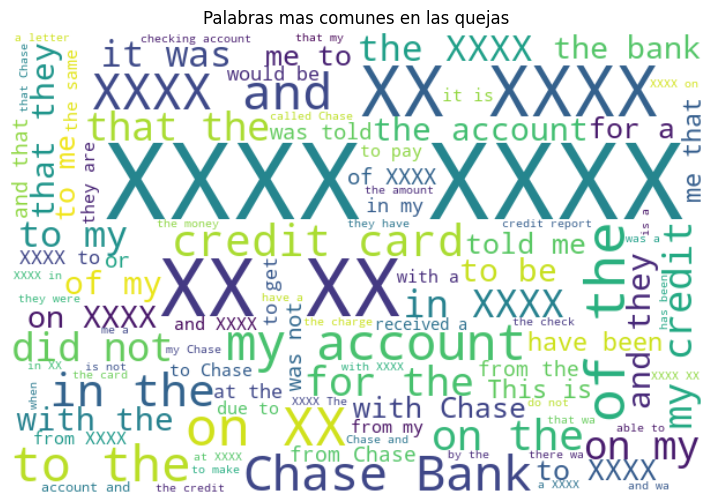

In [14]:
# hacemos un WordCloud con las palabras mas comunes en las quejas
palabras = " ".join(df['complaint_what_happened'])
wordcloud = WordCloud(width=800, height=400,background_color='white', stopwords='english', max_words=100).generate(palabras)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras mas comunes en las quejas')
plt.show()

Podemos observar que las palabras que mas se repiten son las que estan relacionas con credito, tarjetas, cuenta, el nombre del banco y cheques. Lo que nos puede ir dando pistas de las categorias mas repetidas en las quejas.

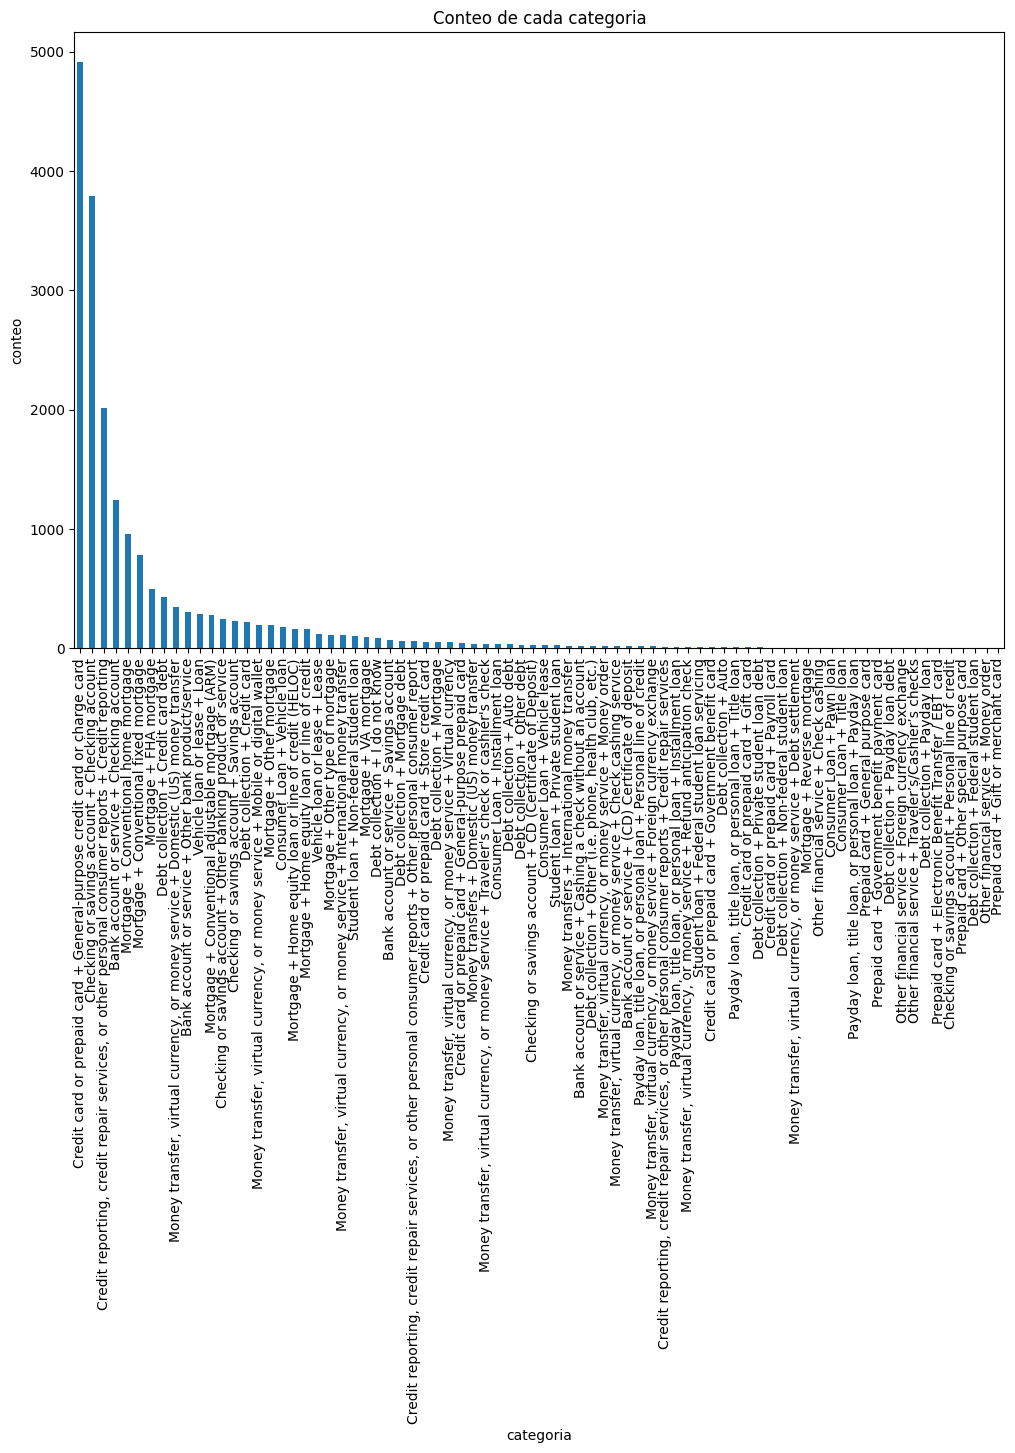

In [19]:
# vemos las categorias mas comunes en las quejas
categorias = df['ticket_classification'].value_counts()


plt.figure(figsize=(12, 8))
categorias.plot(kind='bar')
plt.xlabel('categoria')
plt.ylabel('conteo')
plt.title('Conteo de cada categoria')
plt.show()

Podemos observar que la mayoria de incidencias se concentran en algunas categorias, veamos que proporcion de las quejas ocurren en el top 20 de categorias:

In [24]:
top_20 = categorias.head(20)
proporcion = (top_20 / categorias.sum()) * 100

proporcion

ticket_classification
Credit card or prepaid card + General-purpose credit card or charge card                           25.934715
Checking or savings account + Checking account                                                     19.975742
Credit reporting, credit repair services, or other personal consumer reports + Credit reporting    10.604862
Bank account or service + Checking account                                                          6.549597
Mortgage + Conventional home mortgage                                                               5.036123
Mortgage + Conventional fixed mortgage                                                              4.139640
Mortgage + FHA mortgage                                                                             2.615620
Debt collection + Credit card debt                                                                  2.251753
Money transfer, virtual currency, or money service + Domestic (US) money transfer                   1.8140

Podemos ver que la categoria con mayor casos de problemas es 'Credit card or prepaid card + General-purpose credit card or charge card' seguido de 'Checking or savings account + Checking account' lo que quiere decir que lo que mas causa problemas a los cliente son los problemas con tarjetas y sus cheques, sumando casi 45% de las quejas, y despues los reportes de credito ('Credit reporting, credit repair services, or other personal consumer reports + Credit reporting') con poco mas del 10%